In [111]:
def displayImage(index):
    plt.gray()
    plt.matshow(digits.images[index])
    plt.show

import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
digits=load_digits()

from sklearn.decomposition import PCA

X=digits.data
Y=digits.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=42)

print("The number of components before PCA:",X_train.shape[1])

pca=PCA(.95)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
print("The number of components after PCA:",X_train.shape[1])


lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
Y_pred_training=lr.predict(X_train)

print("The training accuracy is: ",accuracy_score(Y_pred_training,Y_train))
print("The test accuracy is: ",accuracy_score(Y_pred,Y_test))


The number of components before PCA: 64
The number of components after PCA: 28
The training accuracy is:  1.0
The test accuracy is:  0.9555555555555556


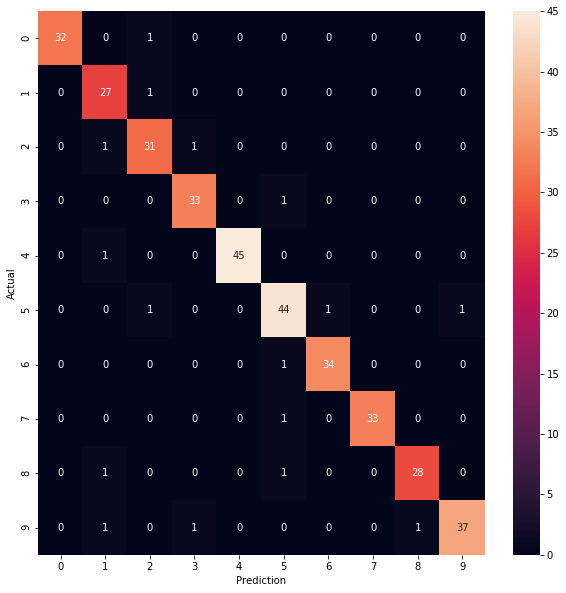

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.show()

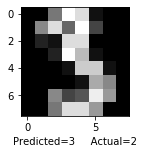

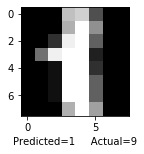

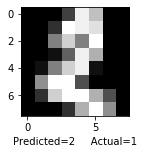

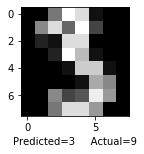

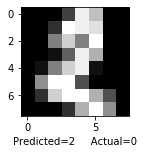

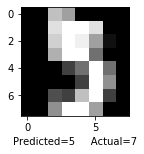

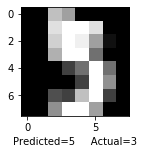

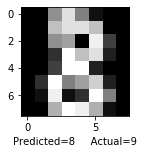

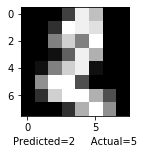

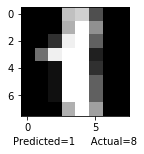

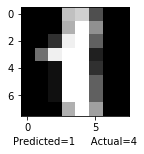

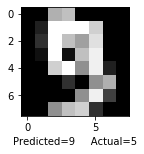

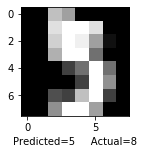

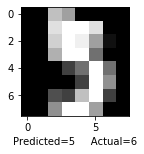

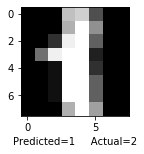

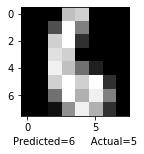

The total number of instances went wrong are:  17


In [109]:
def displayImage(index,predIndex,testIndex):
    plt.figure(figsize=(2,2))
    plt.gray()
    plt.imshow(digits.images[index])
    label="Predicted="+str(predIndex)+"     "+"Actual="+str(testIndex)
    plt.xlabel(label)
    plt.show()

count=1
for i in range(len(Y_pred)):
    if Y_pred[i] != Y_test[i]:
        count=count+1
        displayImage(Y_pred[i],Y_pred[i],Y_test[i])
        
print("The total number of instances went wrong are: ",count)